<a href="https://colab.research.google.com/github/acophisoph/MGFS/blob/main/MGF!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

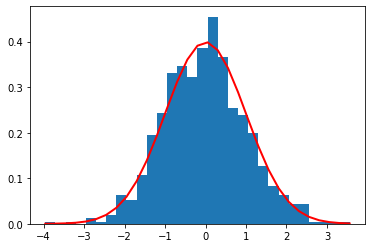

Kurt is 3.3240395498001463
Skew is -0.02116734637073037
Devi is 1.0167242755783543
Mean is -0.025800470039774204


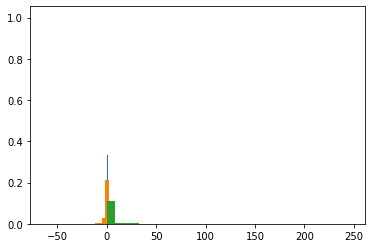

In [5]:
import numpy as np  

mu, sigma = 0, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()




def power(list, n):
    return [i ** n for i in list]

s2 = power(s,2)
count, bins, ignored = plt.hist(s2, 30, density=True)

s3 = power(s,3)
count, bins, ignored = plt.hist(s3, 30, density=True)

s4 = power(s,4)
count, bins, ignored = plt.hist(s4, 30, density=True)

plt.show



def avg(list):
    return sum(list)/len(list)
    
print("Kurt is", avg(s4))
print("Skew is", avg(s3))
print("Devi is", avg(s2))
print("Mean is", avg(s))



#https://towardsdatascience.com/moment-generating-function-explained-27821a739035
#https://www.probabilitycourse.com/chapter6/6_1_3_moment_functions.php


In [ ]:
'''
from sympy import *
import numpy as np
import math
x = Symbol('x')
y = x**2 + 1
yprime = y.diff(x)
yprime

f = lambdify(x, yprime, 'numpy')
f(np.ones(1))

'''


'''
x = np.linspace(0,10,100)
dx = x[1]-x[0]
y = x**2 + 1
dydx = np.gradient(y, dx)
print(dydx)
'''

'\nx = np.linspace(0,10,100)\ndx = x[1]-x[0]\ny = x**2 + 1\ndydx = np.gradient(y, dx)\nprint(dydx)\n'

Taylor expansion at n=1 x
Taylor expansion at n=2 x**2*log(2) + x
Taylor expansion at n=3 x**3*log(2)**2/2 + x**2*log(2) + x
Taylor expansion at n=4 x**4*log(2)**3/6 + x**3*log(2)**2/2 + x**2*log(2) + x


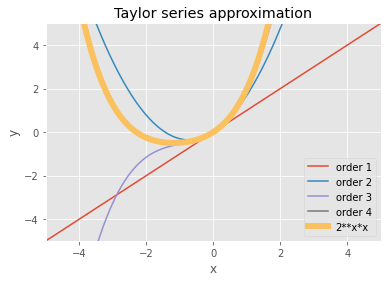

In [ ]:
import sympy as sy
import numpy as np
from sympy.functions import sin,cos
import matplotlib.pyplot as plt

plt.style.use("ggplot")

# Define the variable and the function to approximate
x = sy.Symbol('x')
f = x*2**x############ CHANGE FUNCTION ##########
x_lims = [-5,5] ###### CHANGE INTERVALS #########
t = 5 ################ HOW MANY TERMS ###########
c = 0 ################ CENTER POINT #############

# Factorial function
def factorial(n):
    if n <= 0:
        return 1
    else:
        return n*factorial(n-1)

# Taylor approximation at x0 of the function 'function'
def taylor(function,x0,n):
    i = 0
    p = 0
    while i <= n:
        p = p + (function.diff(x,i).subs(x,x0))/(factorial(i))*(x-x0)**i
        i += 1
    return p


# Plot results
def plot():
    x1 = np.linspace(x_lims[0],x_lims[1],800)
    y1 = []
    # Approximate up until 10 starting from 0 and using steps of 1
    for j in range(1,t,1):
        func = taylor(f,c,j)
        print('Taylor expansion at n='+str(j),func)
        for k in x1:
            y1.append(func.subs(x,k))
        plt.plot(x1,y1,label='order '+str(j))
        y1 = []
    # Evaluate Actual Function
    y0 = []
    for k in x1:
        y0.append(func.subs(x,k))
    # Plot the function to approximate (sine, in this case)
    plt.plot(x1,y0,label=f, linewidth = 6.0)
    plt.xlim(x_lims)
    plt.ylim(x_lims)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.title('Taylor series approximation')
    plt.show()

plot()

#http://firsttimeprogrammer.blogspot.com/2015/03/taylor-series-with-python-and-sympy.html
#https://www.wolframalpha.com/widgets/view.jsp?id=f9476968629e1163bd4a3ba839d60925

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure
from ipywidgets import interact
import ipywidgets as widgets
import scipy as sci
import scipy.stats as ss
####REFERENCE#####
# https://docs.scipy.org/doc/scipy/reference/stats.html
# https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html
# https://medium.com/@srowen/common-probability-distributions-347e6b945ce4#




@interact
def stats (w = widgets.SelectMultiple( options=['Normal', 'Binomial', 'Exponential', 'Uniform', 'Geometric', 'Poisson', 'Gamma', 'Beta', 'Cauchy'], value=['Binomial'], description='Stats Distribution', disabled=False )):
    
    if w[0]  == 'Normal':
        @interact
        def normal (axlim = widgets.IntSlider(min=1, max=100, step=1, value=10), mean = widgets.IntSlider(min=-10, max=10, step=1, value=0), stdev = widgets.IntSlider(min=1, max=10, step=1, value=1)):
            x = np.linspace(-axlim, axlim, 5000)
            y_pdf = ss.norm.pdf(x, mean, stdev)
            plt.plot(x, y_pdf, label='pdf')
            plt.xlim(-axlim,axlim)
            plt.show()
        
    if w[0] == 'Binomial':
        @interact
        def binomial (axlim = widgets.IntSlider(min=1, max=100, step=1, value=10), number = widgets.IntSlider(min=1, max=10, step=1, value=1), probability = widgets.FloatSlider(min=0.1, max=1, step=0.1, value=0.5)):
            fig, ax = plt.subplots(1, 1)
            rv = ss.binom(number, probability)
            x = np.arange(ss.binom.ppf(0.01, number, probability), ss.binom.ppf(0.99, number, probability))
            ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='binom pmf')
            ax.legend(loc='best', frameon=False)
            plt.xlim(-axlim,axlim)
            plt.show()

    if w[0]  == 'Exponential':
        @interact
        def exponential (axlim = widgets.IntSlider(min=1, max=100, step=1, value=10), mean = widgets.IntSlider(min=-10, max=10, step=1, value=0), stdev = widgets.IntSlider(min=1, max=10, step=1, value=1)):
            x = np.linspace(-axlim, axlim, 5000)
            y_pdf = ss.expon.pdf(x, mean, stdev)
            plt.plot(x, y_pdf, label='pdf')
            plt.xlim(-axlim,axlim)
            plt.show()
    
    if w[0] == 'Uniform':
        @interact
        def uniform (axlim = widgets.IntSlider(min=1, max=100, step=1, value=10), start = widgets.IntSlider(min=-10, max=10, step=1, value=0), scale = widgets.FloatSlider(min=1, max=10, step=1, value=1)):
            fig, ax = plt.subplots(1, 1)
            rv = ss.uniform(start, scale)
            x = np.arange(ss.uniform.ppf(0.01, start, scale), ss.uniform.ppf(0.99, start, scale))
            ax.vlines(x, 0, rv.pdf(x), colors='k', linestyles='-', lw=1, label='uniform pmf')
            ax.legend(loc='best', frameon=False)
            plt.xlim(-axlim,axlim)
            plt.show()

    if w[0] == 'Geometric':
        @interact
        def geometric (axlim = widgets.IntSlider(min=1, max=100, step=1, value=10), k = widgets.IntSlider(min=1, max=10, step=1, value=1), p = widgets.FloatSlider(min=0.1, max=1, step=0.1, value=0.1)):
            fig, ax = plt.subplots(1, 1)
            rv = ss.geom(p, k)
            x = np.arange(ss.geom.ppf(0.01, p, k), ss.geom.ppf(0.99, p, k))
            ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='geometric pmf')
            ax.legend(loc='best', frameon=False)
            plt.xlim(-axlim,axlim)
            plt.show()

    if w[0] == 'Poisson':
        @interact
        def poisson (axlim = widgets.IntSlider(min=1, max=100, step=1, value=10), start = widgets.IntSlider(min=1, max=10, step=1, value=1), scale = widgets.FloatSlider(min=1, max=10, step=1, value=1)):
            fig, ax = plt.subplots(1, 1)
            rv = ss.poisson(start, scale)
            x = np.arange(ss.poisson.ppf(0.01, start, scale), ss.poisson.ppf(0.99, start, scale))
            ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='poisson pmf')
            ax.legend(loc='best', frameon=False)
            plt.xlim(-axlim,axlim)
            plt.show()

    if w[0]  == 'Gamma':
        @interact
        def gamma (axlim = widgets.IntSlider(min=1, max=100, step=1, value=10), a = widgets.IntSlider(min=1, max=10, step=1, value=1), s = widgets.IntSlider(min=1, max=10, step=1, value=1)):
            x = np.linspace(-axlim, axlim, 5000)
            y_pdf = ss.gamma.pdf(x, a, s)
            plt.plot(x, y_pdf, label='pdf')
            plt.xlim(-axlim,axlim)
            plt.show()

    if w[0]  == 'Beta':
        @interact
        def beta (axlim = widgets.IntSlider(min=1, max=100, step=1, value=10), a = widgets.IntSlider(min=1, max=10, step=1, value=1), b = widgets.IntSlider(min=1, max=10, step=1, value=1)):
            x = np.linspace(-axlim, axlim, 5000)
            y_pdf = ss.beta.pdf(x, a, b)
            plt.plot(x, y_pdf, label='pdf')
            plt.xlim(-axlim,axlim)
            plt.show()

    if w[0]  == 'Cauchy':
        @interact
        def cauchy (axlim = widgets.IntSlider(min=1, max=100, step=1, value=10), mean = widgets.IntSlider(min=-10, max=10, step=1, value=0), stdev = widgets.IntSlider(min=1, max=10, step=1, value=1)):
            x = np.linspace(-axlim, axlim, 5000)
            y_pdf = ss.cauchy.pdf(x, mean, stdev)
            plt.plot(x, y_pdf, label='pdf')
            plt.xlim(-axlim,axlim)
            plt.show()

interactive(children=(SelectMultiple(description='Stats Distribution', index=(1,), options=('Normal', 'Binomia…